<a href="https://colab.research.google.com/github/alokjha1993/Codes-on-US-Arrest-rate/blob/master/Adobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on this data please complete the following exercise:
1. Profile and visualize the differences between active and inactive members based on various features like tenure, subscription offering, geo, etc. (Active customers are defined as any users who are active on at least 1 product)
2. Illustrate which features are the best predictors of activity level
3. Create an interactive chart (on plotly, bokeh, or any other library you are comfortable with) that plots the tenure distribution by subscription_offerings (by having a dropdown list of which 1 or more offerings can be selected). The X axis should contain the tenure, the y axis should show the user count, and the data should be split into 2 different categories(colors) based on whether or not the user is active.
4. Create a model to predict whether or not a particular customer will actively use atleast 1 product.


In [84]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [4]:
import pandas as pd 
import os

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sample_data.csv to sample_data.csv
User uploaded file "sample_data.csv" with length 160906 bytes


Reading and splitting the data 

In [5]:
dataset = pd.read_csv("sample_data.csv")
dataset.shape

(1000, 19)

In [6]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (950, 19)
Unseen Data For Predictions: (50, 19)


In [7]:
data

,member_guid,subscription_id,subscription_start_wk,geo,market_area,market_segment,purchase_source,promo_regular,cc_segment,subscription_offerings,subscription_type,entitlement_period,twp_flag,subscription_tenure,member_classification,category,product,visited_website,active_flag
0,100,1100.0,2020-30,AMER,CAN,EDUCATION,ADOBE.COM/CC.COM,PROMO,STUDENT,STE - All Apps,IN,ANNUAL,Direct_Purchase,186,NEW - FIRST SUBSCRIPTION,DESKTOP,PHOTOSHOP,1,1.0
1,312,1314.0,2015-11,EMEA,GER,EDUCATION,ADOBE.COM/CC.COM,REGULAR,STUDENT,STE - All Apps,IN,ANNUAL,Direct_Purchase,2145,NEW - FIRST SUBSCRIPTION,DESKTOP,ACROBAT,1,1.0
2,342,1344.0,2017-02,JPN,JPN,COMMERCIAL,RESELLER,REGULAR,TEAM,CCT - Single App - Photoshop,TM,ANNUAL,Direct_Purchase,1473,NEW - FIRST SUBSCRIPTION,DESKTOP,OVERALL,1,1.0
3,530,1533.0,2012-33,AMER,US,EDUCATION,ADOBE.COM/CC.COM,REGULAR,STUDENT,STE - All Apps,IN,ANNUAL,Direct_Purchase,1967,NEW - FIRST SUBSCRIPTION,DESKTOP,PHOTOSHOP,0,1.0
4,365,1367.0,2019-07,EMEA,EE,EDUCATION,ADOBE.COM/CC.COM,PROMO,STUDENT,STE - All Apps,IN,ANNUAL,Direct_Purchase,708,NEW - FIRST SUBSCRIPTION,MOBILE,OVERALL,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,261,1263.0,2020-46,EMEA,FRA,COMMERCIAL,ADOBE.COM/CC.COM,PROMO,INDIVIDUAL,CCI - All Apps,IN,ANNUAL,Direct_Purchase,72,NEW - FIRST SUBSCRIPTION,DESKTOP,OVERALL,1,0.0
946,746,1749.0,2016-04,AMER,US,COMMERCIAL,ADOBE.COM/CC.COM,REGULAR,ACROBAT CC,Acrobat,IN,ANNUAL,Direct_Purchase,717,NEW - FIRST SUBSCRIPTION,DESKTOP,OVERALL,0,1.0
947,45,1045.0,2019-20,AMER,US,EDUCATION,ADOBE.COM/CC.COM,REGULAR,STUDENT,STE - All Apps,IN,ANNUAL,Direct_Purchase,620,EXISTING - MIGRATE,DESKTOP,INDESIGN,1,1.0
948,94,1094.0,2016-09,AMER,US,GOVERNMENT,RESELLER,REGULAR,TEAM,CCT - Single App - InDesign,TM,ANNUAL,Direct_Purchase,1793,NEW - FIRST SUBSCRIPTION,DESKTOP,INDESIGN,1,1.0


In [11]:
import numpy as np
from pycaret.classification import *

In [12]:
exp_clf101 = setup(data = data, target = 'active_flag', session_id=123) 

,Description,Value
0,session_id,123
1,Target,active_flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(950, 19)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='active_flag', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste



#  Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.

In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8399,0.5872,1.0000,0.8397,0.9129,0.0157,0.0292,0.198
dummy,Dummy Classifier,0.8383,0.5000,1.0000,0.8383,0.9120,0.0000,0.0000,0.009
knn,K Neighbors Classifier,0.8284,0.4859,0.9803,0.8414,0.9054,0.0336,0.0390,0.030
lr,Logistic Regression,0.8234,0.5916,0.9745,0.8405,0.9024,0.0191,0.0189,0.419
et,Extra Trees Classifier,0.8104,0.5567,0.9627,0.8359,0.8947,-0.0258,-0.0401,0.180
gbc,Gradient Boosting Classifier,0.8052,0.5622,0.9527,0.8374,0.8911,-0.0114,-0.0178,0.213
lightgbm,Light Gradient Boosting Machine,0.7938,0.5397,0.9331,0.8390,0.8834,0.0056,0.0034,0.091
ada,Ada Boost Classifier,0.7922,0.5834,0.9272,0.8413,0.8819,0.0209,0.0202,0.104
ridge,Ridge Classifier,0.7889,0.0000,0.9253,0.8394,0.8799,0.0054,0.0023,0.015
dt,Decision Tree Classifier,0.7608,0.5208,0.8761,0.8449,0.8597,0.0402,0.0414,0.026


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

# Create a Model

Decision Tree Classifier

In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7541,0.5716,0.8431,0.8600,0.8515,0.1376,0.1378
1,0.7705,0.5412,0.8824,0.8491,0.8654,0.0896,0.0903
2,0.8033,0.5608,0.9216,0.8545,0.8868,0.1449,0.1511
3,0.7869,0.5108,0.9216,0.8393,0.8785,0.0270,0.0291
4,0.6885,0.4118,0.8235,0.8077,0.8155,-0.1839,-0.1842
5,0.7213,0.5118,0.8235,0.8400,0.8317,0.0226,0.0227
6,0.7500,0.4869,0.8627,0.8462,0.8544,-0.0274,-0.0275
7,0.8000,0.6536,0.8627,0.8980,0.8800,0.2814,0.2835
8,0.7333,0.4400,0.8800,0.8148,0.8462,-0.1429,-0.1491


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [15]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


K Neighbors Classifier

In [16]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8197,0.5471,0.9608,0.8448,0.8991,0.0846,0.1041
1,0.8361,0.4412,1.0000,0.8361,0.9107,0.0000,0.0000
2,0.8361,0.4775,1.0000,0.8361,0.9107,0.0000,0.0000
3,0.7869,0.4745,0.9412,0.8276,0.8807,-0.0819,-0.1007
4,0.8361,0.5441,1.0000,0.8361,0.9107,0.0000,0.0000
5,0.8197,0.4147,0.9804,0.8333,0.9009,-0.0307,-0.0572
6,0.8333,0.4608,0.9608,0.8596,0.9074,0.0991,0.1178
7,0.8833,0.5871,1.0000,0.8793,0.9358,0.3269,0.4420
8,0.8167,0.4620,0.9800,0.8305,0.8991,-0.0312,-0.0582


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


Random Forest Classifier

In [17]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8361,0.5039,1.0,0.8361,0.9107,0.0000,0.0000
1,0.8361,0.6549,1.0,0.8361,0.9107,0.0000,0.0000
2,0.8361,0.6676,1.0,0.8361,0.9107,0.0000,0.0000
3,0.8525,0.6245,1.0,0.8500,0.9189,0.1567,0.2915
4,0.8361,0.5225,1.0,0.8361,0.9107,0.0000,0.0000
5,0.8361,0.5735,1.0,0.8361,0.9107,0.0000,0.0000
6,0.8500,0.5523,1.0,0.8500,0.9189,0.0000,0.0000
7,0.8500,0.5338,1.0,0.8500,0.9189,0.0000,0.0000
8,0.8333,0.5020,1.0,0.8333,0.9091,0.0000,0.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# Tune a Model

When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.



Decision Tree Classifier

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8361,0.5,1.0,0.8361,0.9107,0.0,0.0
1,0.8361,0.5,1.0,0.8361,0.9107,0.0,0.0
2,0.8361,0.5,1.0,0.8361,0.9107,0.0,0.0
3,0.8361,0.5,1.0,0.8361,0.9107,0.0,0.0
4,0.8361,0.5,1.0,0.8361,0.9107,0.0,0.0
5,0.8361,0.5,1.0,0.8361,0.9107,0.0,0.0
6,0.8500,0.5,1.0,0.8500,0.9189,0.0,0.0
7,0.8500,0.5,1.0,0.8500,0.9189,0.0,0.0
8,0.8333,0.5,1.0,0.8333,0.9091,0.0,0.0


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


K Neighbors Classifier

In [ ]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8361,0.6108,1.0,0.8361,0.9107,0.0,0.0
1,0.8361,0.4706,1.0,0.8361,0.9107,0.0,0.0
2,0.8361,0.5931,1.0,0.8361,0.9107,0.0,0.0
3,0.8361,0.4480,1.0,0.8361,0.9107,0.0,0.0
4,0.8361,0.5804,1.0,0.8361,0.9107,0.0,0.0
5,0.8361,0.4696,1.0,0.8361,0.9107,0.0,0.0
6,0.8500,0.5272,1.0,0.8500,0.9189,0.0,0.0
7,0.8500,0.5708,1.0,0.8500,0.9189,0.0,0.0
8,0.8333,0.4620,1.0,0.8333,0.9091,0.0,0.0


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


Random Forest Classifier

In [18]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6885,0.6627,0.7059,0.9000,0.7912,0.2121,0.2383
1,0.5738,0.4627,0.5882,0.8571,0.6977,0.0537,0.0661
2,0.7541,0.7941,0.7451,0.9500,0.8352,0.3780,0.4247
3,0.6557,0.6627,0.6667,0.8947,0.7640,0.1751,0.2037
4,0.5574,0.6333,0.5294,0.9000,0.6667,0.1244,0.1699
5,0.5574,0.5725,0.5686,0.8529,0.6824,0.0408,0.0512
6,0.4833,0.5316,0.4902,0.8333,0.6173,-0.0333,-0.0467
7,0.5500,0.5207,0.6078,0.8158,0.6966,-0.1066,-0.1259
8,0.5667,0.4990,0.6000,0.8333,0.6977,0.0000,0.0000


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# Plot a Model

AUC Plot 

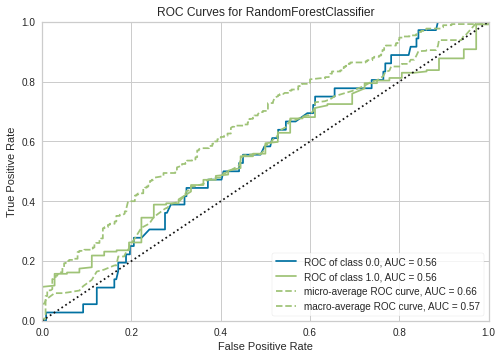

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(tuned_rf)

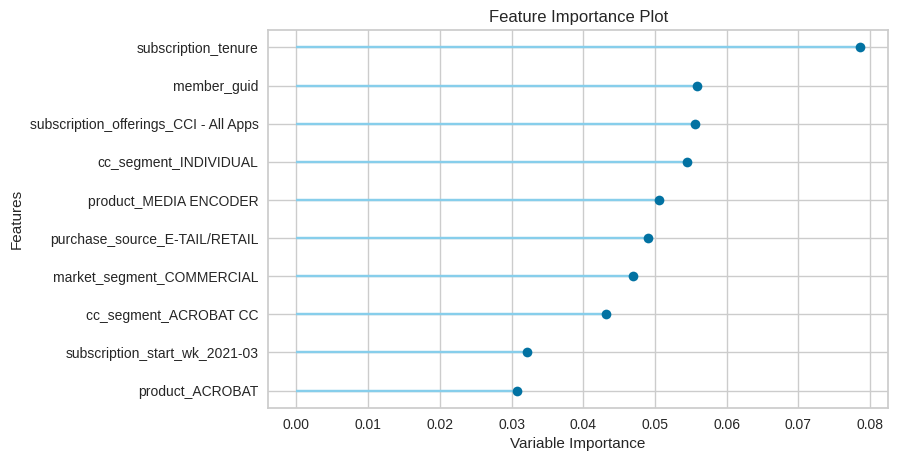

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_rf, plot='feature')

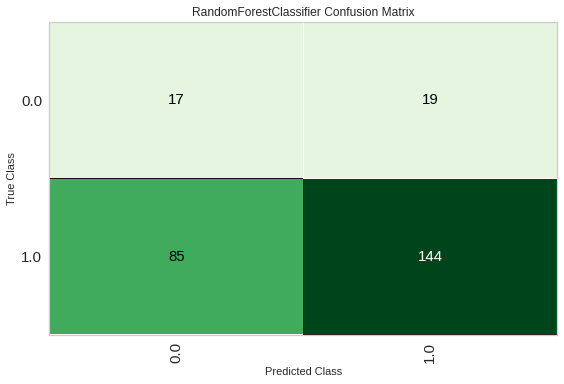

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [23]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…